# NFT Project 

### Exploration
This is primarily to figure out what is in this dataset, the June 2017 to November 2021. https://www.kaggle.com/datasets/mathurinache/nft-history-sales

And the Ethereum dataset, November 2015-March 2022. https://www.kaggle.com/datasets/varpit94/ethereum-data

In [2]:
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import pandas as pd
import os
import numpy as np
import datetime

## NFT Sales

In [3]:
f = open("../data/jun17_nov21_nft_sales.csv",'r')
fi = open("../data/ETH-USD.csv", 'r')
nft = pd.read_csv(f)
nft["Date"] = pd.to_datetime(nft['Date'], format='%Y-%m-%d')
crypto = pd.read_csv(fi)
nft.head()
nft.tail()
#nft.describe()

,Date,Sales_USD_cumsum,Number_of_Sales_cumsum,Active_Market_Wallets_cumsum,Primary_Sales_cumsum,Secondary_Sales_cumsum,AverageUSD_cum,Sales_USD,Number_of_Sales,Active_Market_Wallets,Primary_Sales
1601,2021-11-08,1.008803e+10,10913146,NaN,6541355,14829.0,924.39,7.706698e+07,59264.0,NaN,44435.0
1602,2021-11-09,1.014001e+10,10964025,NaN,6573511,18723.0,924.84,5.197508e+07,50879.0,NaN,32156.0
1603,2021-11-10,1.019902e+10,11008847,NaN,6601205,17128.0,926.44,5.901034e+07,44822.0,NaN,27694.0
1604,2021-11-11,1.023456e+10,11022782,NaN,6609013,6127.0,928.49,3.554317e+07,13935.0,NaN,7808.0
1605,2021-11-12,1.022836e+10,11020587,NaN,6607842,-1024.0,928.11,-6.196720e+06,-2195.0,NaN,-1171.0


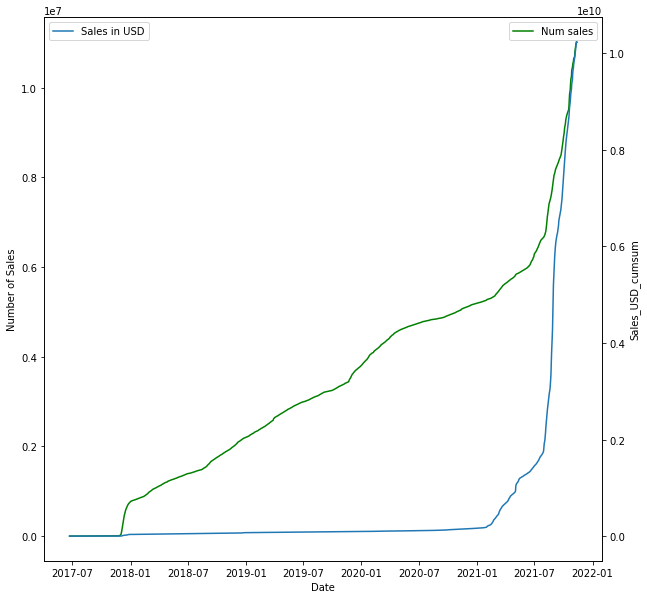

In [4]:
#Plotting
plt.figure(figsize=(10,10))
plt.xlabel('Date')
plt.ylabel('Number of Sales')
sns.lineplot(x=nft["Date"],y=nft["Number_of_Sales_cumsum"], label = "Num sales", color = "GREEN")
ax2 = plt.twinx()
sns.lineplot(x=nft["Date"],y=nft["Sales_USD_cumsum"], label = "Sales in USD")
plt.legend(loc='upper left')

## Cryptocurrency Prices

In [5]:
start = datetime.datetime(2017, 6, 22)
end = datetime.datetime(2021, 11, 12)
crypto["Date"] = pd.to_datetime(crypto['Date'], format='%Y-%m-%d')
crypto = crypto[(crypto["Date"] >= start) & (crypto["Date"] <= end)]
crypto.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,893249984
1,2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,885985984
2,2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,842300992
3,2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1613479936
4,2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1041889984
5,2017-11-14,316.763000,340.177002,316.763000,337.631012,337.631012,1069680000
6,2017-11-15,337.963989,340.911987,329.812988,333.356995,333.356995,722665984
7,2017-11-16,333.442993,336.158997,323.605988,330.924011,330.924011,797254016
8,2017-11-17,330.166992,334.963989,327.523010,332.394012,332.394012,621732992
9,2017-11-18,331.980011,349.615997,327.687012,347.612000,347.612000,649638976


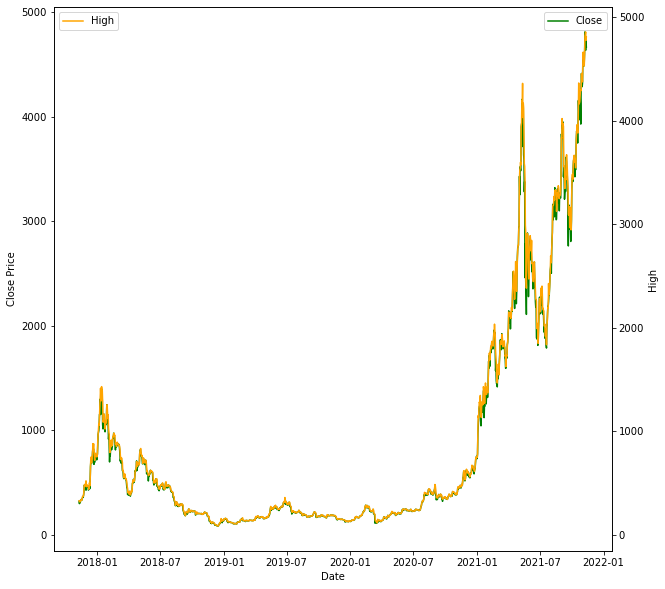

In [6]:
#Plotting
plt.figure(figsize=(10,10))
plt.xlabel('Date')
plt.ylabel('Close Price')
sns.lineplot(x=crypto["Date"],y=crypto["Close"], label = "Close", color = "GREEN")
ax2 = plt.twinx()
sns.lineplot(x=crypto["Date"],y=crypto["High"], label = "High", color = "ORANGE")
plt.legend(loc='upper left')

##### Thoughts
I think that since the closing price and the daily high price are so closely correllated that it doesn't really matter what I use. So I'm doing the closing price because it feels most logical to me. 

## Plot both

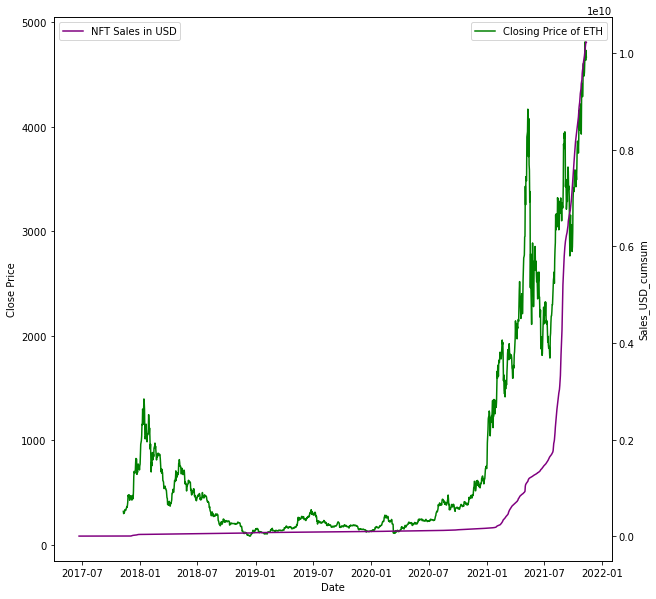

In [7]:
plt.figure(figsize=(10,10))
plt.xlabel('Date')
plt.ylabel('Close Price')
sns.lineplot(x=crypto["Date"],y=crypto["Close"], label = "Closing Price of ETH", color = "GREEN")
ax2 = plt.twinx()
sns.lineplot(x=nft["Date"],y=nft["Sales_USD_cumsum"], label = "NFT Sales in USD", color = "PURPLE")
plt.legend(loc='upper left')

### Summary
What does this tell us? Honestly idk but both lines went crazy in early 2021 and they definitely do appear to be correlated. I think the reason why the beginning end doesn't look the same is because ETH had a value spike in 2017-2018 but NFTs hadn't taken off at that point. 

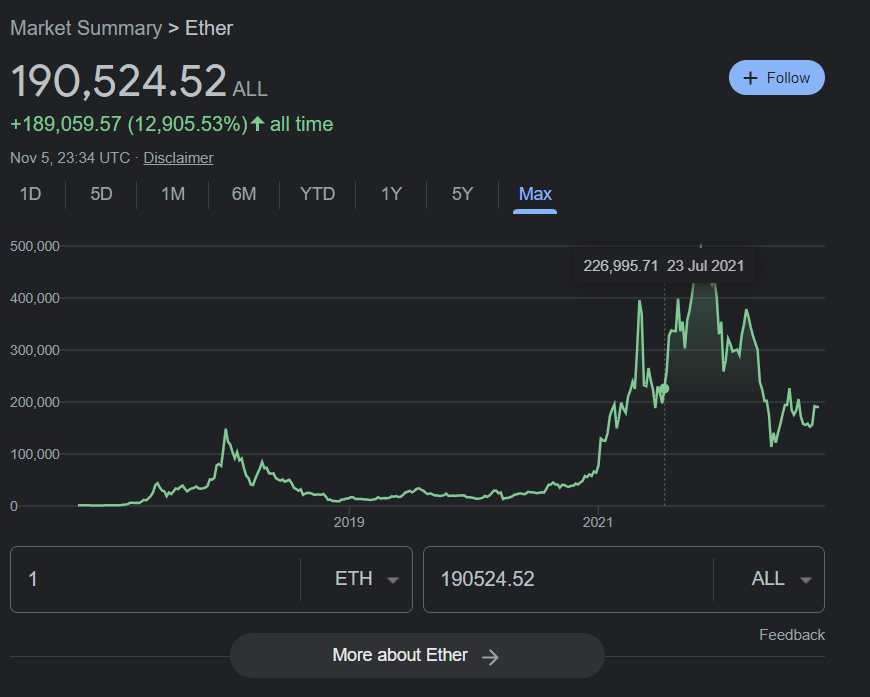

## Comparison with US Economy as measured by GDP

In [8]:
fil = open("../data/USALORSGPNOSTSAM.csv", 'r')
gdp = pd.read_csv(fil)
gdp["DATE"] = pd.to_datetime(gdp['DATE'], format='%Y-%m-%d')
gdp.head()

,DATE,USALORSGPNOSTSAM
0,2017-05-01,99.707403
1,2017-06-01,99.740611
2,2017-07-01,99.789707
3,2017-08-01,99.853949
4,2017-09-01,99.931219


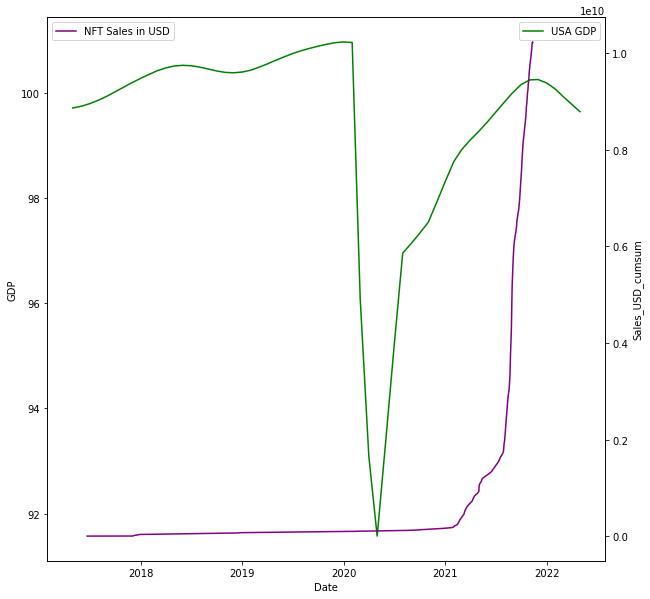

In [9]:
plt.figure(figsize=(10,10))
plt.xlabel('Date')
plt.ylabel('GDP')
sns.lineplot(x=gdp["DATE"],y=gdp["USALORSGPNOSTSAM"], label = "USA GDP", color = "GREEN")
ax2 = plt.twinx()
sns.lineplot(x=nft["Date"],y=nft["Sales_USD_cumsum"], label = "NFT Sales in USD", color = "PURPLE")
plt.legend(loc='upper left')

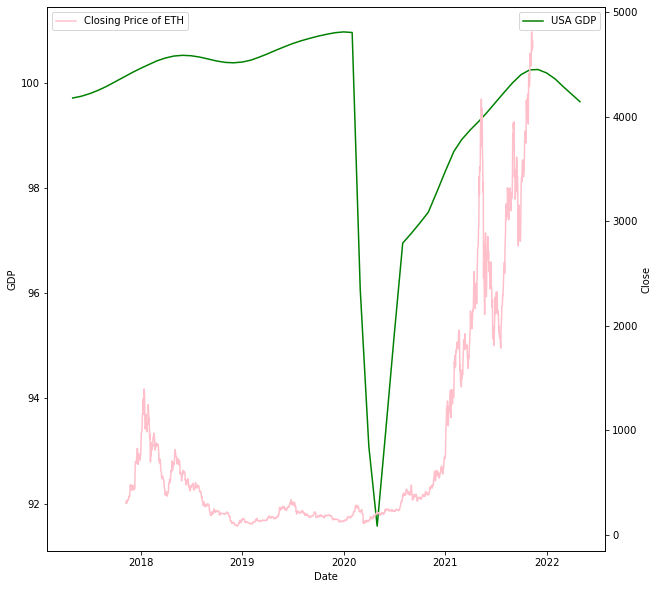

In [10]:
plt.figure(figsize=(10,10))
plt.xlabel('Date')
plt.ylabel('GDP')
sns.lineplot(x=gdp["DATE"],y=gdp["USALORSGPNOSTSAM"], label = "USA GDP", color = "GREEN")
ax2 = plt.twinx()
sns.lineplot(x=crypto["Date"],y=crypto["Close"], label = "Closing Price of ETH", color = "PINK")
plt.legend(loc='upper left')

## Thoughts
Not great correllation here between the GDP and crypto markets or NFTs. Quite interesting actually, it seems like the functioning of the wider US economy has very little to do with either thing here. Also NFTs took off during COVID, while the economy tanked during that period

# Regression
Trying to do regression and prediction of dataset 

In [49]:
import sklearn
import scipy.stats as stats
from sklearn.linear_model import LinearRegression

#dataset I'm using dropping the sales_usd column and trying to predict it from the crypto set too
#nft.head()
nft_col=nft.drop(['Sales_USD_cumsum', 'Number_of_Sales_cumsum', 'Active_Market_Wallets_cumsum', 'Primary_Sales_cumsum', 'Secondary_Sales_cumsum', 'AverageUSD_cum', 'Sales_USD'], axis=1)
crypto_col = crypto.drop(['Open','Low','Close','Adj Close', 'Volume'], axis=1)
pred = nft_col.merge(crypto_col)
pred.columns = ['Date', 'Number_of_sales', 'Active_markets_wallets', 'Primary_sales', 'ETH_high_price']

pred.head()

,Date,Number_of_sales,Active_markets_wallets,Primary_sales,ETH_high_price
0,2017-11-09,2.0,0.0,0.0,329.451996
1,2017-11-10,0.0,0.0,0.0,324.717987
2,2017-11-11,0.0,0.0,0.0,319.453003
3,2017-11-12,1.0,0.0,0.0,319.153015
4,2017-11-13,2.0,2.0,0.0,328.415009


In [60]:
import datetime as dt

#changing date
pred['Date'] = pd.to_datetime(pred['Date'])
pred['Date']=pred['Date'].map(dt.datetime.toordinal)

#taking out NaN and infinites
pred.replace([np.inf, -np.inf], np.nan, inplace=True)
pred.replace(np.nan, 0)
print("contains NaN: " + str(np.any(np.isnan(pred))))
print("contains infinite: " + str(np.all(np.isfinite(pred))))
pred.head()

# This creates a LinearRegression object
lm = LinearRegression()
lm.fit(pred, nft.Sales_USD)

contains NaN: False
contains infinite: True


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

## Prophet work
beginning to analyse the time series

In [53]:
from prophet import Prophet
timeseries = pd.read_csv("NFT_Sales_History.csv")
timeseries.rename(columns = {'Date':'ds', 'Sales_USD':'y'}, inplace = True)
timeseries.head()

FileNotFoundError: [Errno 2] No such file or directory: 'NFT_Sales_History.csv'

In [13]:
m = Prophet()
m.fit(timeseries)
future = m.make_future_dataframe(periods=365)
future.tail()

20:24:23 - cmdstanpy - INFO - Chain [1] start processing
20:24:23 - cmdstanpy - INFO - Chain [1] done processing


,ds
1965,2022-11-08
1966,2022-11-09
1967,2022-11-10
1968,2022-11-11
1969,2022-11-12


In [14]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1965,2022-11-08,1.606984e+08,1.356415e+08,1.847324e+08
1966,2022-11-09,1.609173e+08,1.373549e+08,1.844622e+08
1967,2022-11-10,1.611282e+08,1.371528e+08,1.843432e+08
1968,2022-11-11,1.618013e+08,1.376192e+08,1.853127e+08
1969,2022-11-12,1.636190e+08,1.393127e+08,1.876688e+08


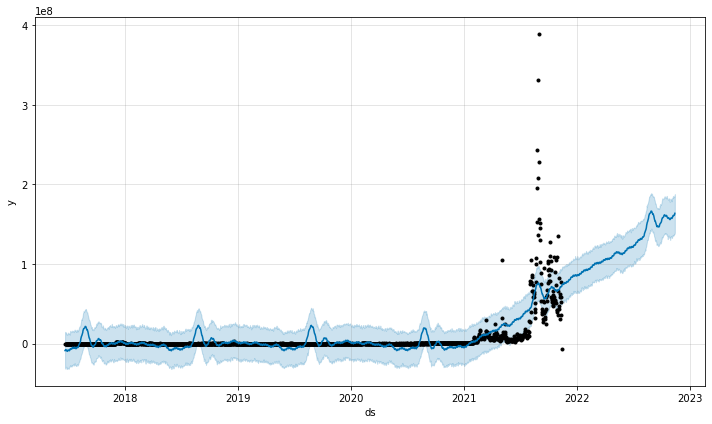

In [15]:
fig1 = m.plot(forecast)

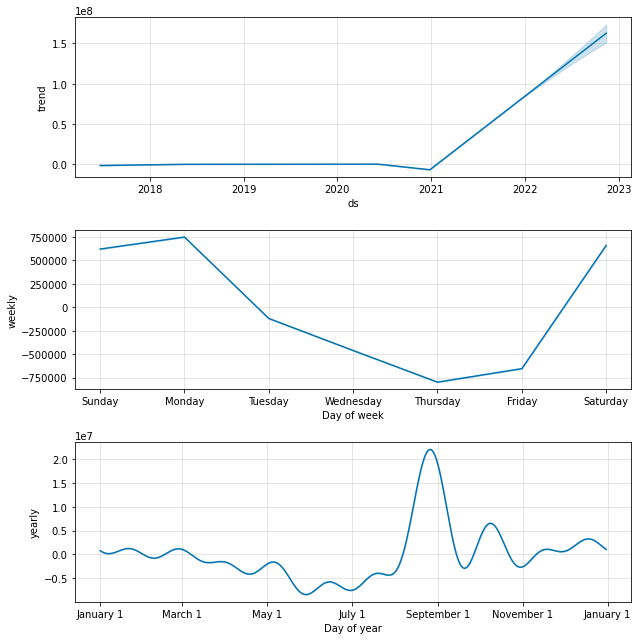

In [16]:
fig2 = m.plot_components(forecast)
